### Table of Contents

* [Imports des packages et des fichiers](#chapter1)
* [Exploration du dataset](#chapter2)
* [Analyse des données](#chapter3)

# 1. Imports des packages et des fichiers 

In [6]:
import numpy as np
import pandas as pd

#data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#data science 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#deep learning 

In [7]:
dataset = pd.read_csv('/Users/Hugo/Downloads/DataScientist_mower_market_datasets (3)/mower_market_datasets/mower_market_snapshot.csv', sep = ';')

In [3]:
submission_set = pd.read_csv('/Users/Hugo/Downloads/DataScientist_mower_market_datasets (3)/mower_market_datasets/submission_set.csv', sep = ';')

# 2. Exploration du dataset

In [6]:
dataset.head(10)

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
0,10.492623,0.042528,18377,633.766584,828.802103,195.03551928211797,auto-portee,Low,3ans,0.006360,0.650648
1,20.273730,0.037896,19363,731.576817,882.894916,151.31809934886763,auto-portee,Low,3 ans.,0.006840,0.699792
2,20.190457,0.039111,19641,741.218202,919.355522,178.13731921134948,auto-portee,Low,3_ans,0.006179,0.632129
3,27.220131,0.041303,18728,654.255635,817.085097,162.82946157588628,auto-portee,Low,3 anss,0.007925,0.810730
4,16.370911,0.037938,18722,703.094527,844.581465,141.48693796090603,auto-portee,Medium,3ans.,0.007406,0.757614
5,19.548213,0.035428,18268,728.284617,905.297503,177.01288573033196,auto-portee,Medium,3 ans,0.007596,0.777051
6,12.242635,0.035492,18448,757.351286,930.615022,173.26373572791334,auto-portee,Hight,3_ans.,0.007488,0.766056
7,8.676314,0.042066,18943,633.515449,818.075591,184.56014118975136,auto-portee,Low,3 anss,0.005291,0.541318
8,15.264180,0.038804,19640,646.626567,816.774028,170.14746134881673,auto-portee,Low,3_ans.,0.006063,0.620278
9,16.190545,0.034045,19559,628.673360,814.799650,186.1262903279073,auto-portee,Low,3_ans.,0.005700,0.583117


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 11 columns):
capacity          1399 non-null float64
failure_rate      1399 non-null float64
id                1399 non-null int64
margin            1399 non-null float64
price             1399 non-null float64
prod_cost         1381 non-null object
product_type      1399 non-null object
quality           1399 non-null object
warranty          1399 non-null object
market_share      1399 non-null float64
attractiveness    1399 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 120.4+ KB


En se basant sur les données de l'exercice on peut voir que l'on a une colonne supplémentaire 'warranty' qui semble correspondre à la durée de garantie des produits. Les données semblent être assez exhaustives sauf pour le prod_cost.Il semblerait que le prod_cost contiennent aussi des données non numériques qu'il faudra donc cleaner cette colonne.

In [8]:
dataset['prod_cost'] = pd.to_numeric(dataset['prod_cost'], errors='coerce')

In [9]:
dataset[dataset['prod_cost'].isnull()]

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
100,28.029561,0.040033,18993,746.108663,350.216029,NaN,auto-portee,Hight,3anss,0.007847,0.802719
107,31.019904,0.038149,19522,658.116184,411.087712,NaN,auto-portee,Low,3 ans.,0.007505,0.767814
135,23.340049,0.039023,19596,726.196516,396.773981,NaN,auto-portee,Medium,3ans,0.006937,0.709674
154,26.317938,0.098641,19642,272.038610,865.688164,NaN,electrique,Low,2_ans.,0.001632,0.425166
166,39.703060,0.073723,18870,248.010000,70.271198,NaN,electrique,Low,2 ans,0.002607,0.679325
170,34.857361,0.114097,18964,241.552664,72.970497,NaN,electrique,Low,2 anss,0.003039,0.791921
232,41.875278,0.096177,18736,291.932051,891.665482,NaN,electrique,Medium,2_anss,0.002167,0.564682
280,33.383391,0.091738,18359,260.868096,869.049664,NaN,electrique,Low,2 ans,0.002675,0.696976
331,35.137522,0.093361,19251,262.668491,77.213051,NaN,electrique,Low,2_ans.,0.002158,0.562313
471,44.813757,0.102862,18379,259.776821,72.035083,NaN,electrique,Medium,2 ans,0.002886,0.751908


In [10]:
dataset = dataset.dropna()

# 3. Analyses des données 

In [11]:
dataset.describe(include='all')

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368,1368,1368,1368.000000,1368.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,3,27,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,essence,Low,1 an.,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,825,949,101,NaN,NaN
mean,47.650756,0.166384,18958.747807,186.318050,253.145878,55.434239,NaN,NaN,NaN,0.002144,0.636090
std,19.944445,0.073597,404.283511,190.921188,254.578522,61.474453,NaN,NaN,NaN,0.001790,0.124250
min,0.013884,0.028906,18259.000000,52.943989,62.162200,-64.000000,NaN,NaN,NaN,0.000564,0.297384
25%,35.809480,0.095632,18608.750000,62.269455,73.318626,10.667699,NaN,NaN,NaN,0.001133,0.549110
50%,50.345136,0.199738,18958.500000,66.411687,78.223803,12.141745,NaN,NaN,NaN,0.001400,0.641078
75%,61.948233,0.227887,19309.250000,266.011165,382.337683,113.655262,NaN,NaN,NaN,0.002443,0.726733


In [12]:
#product type 
dataset.product_type.value_counts()

essence        825
electrique     404
auto-portee    139
Name: product_type, dtype: int64

Nous avons majoritairement des tondeuses essence dans le dataset, et beaucoup moins de tondeuse autoportee.

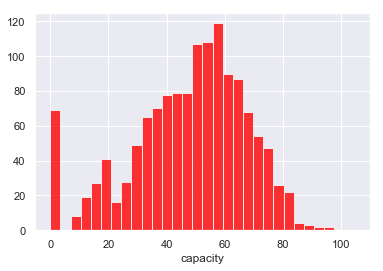

In [13]:
#capacity : en litre la capcité de la tondeuse
sns.set()
sns.set_style('darkgrid')
sns.distplot(dataset['capacity'], kde = False, bins = 30, hist_kws= {'color' :'red', 'alpha':0.8})
plt.show()

On peut remarquer un nombre important de tondeuse qui ont une capacité proche de 0. Peut être est-ce du à un problème de qualité de donnée il faudra donc surement exclure ses lignes.

In [14]:
dataset = dataset[dataset['capacity'] >1]

In [15]:
dataset.shape

(1299, 11)

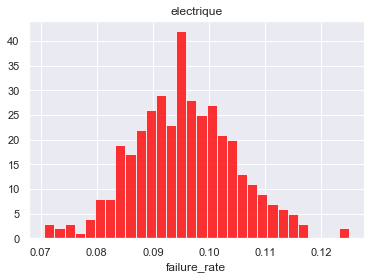

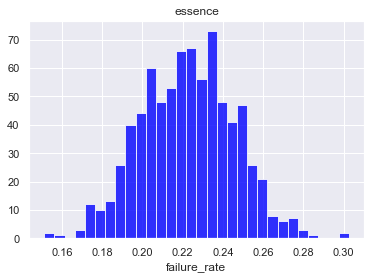

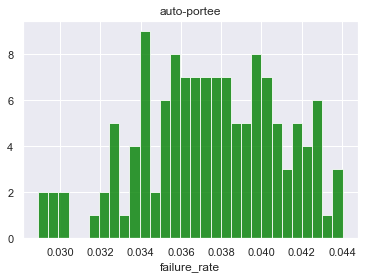

In [16]:
#failure rate 
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['failure_rate'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

On remarque que la distribution est normale mais avec des paramètre différents pour les 3 types de tondeuses. 

In [17]:
#test de cohérence de donnée
sum(round(dataset['price'] - dataset['prod_cost'],2) != round(dataset['margin'],2))

37

The column margin is equal to the difference between the price and the production cost in most case except for 37 cases : 

In [18]:
dataset[round(dataset['price'] - dataset['prod_cost'],2) != round(dataset['margin'],2)]

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
47,25.136228,0.044026,19549,618.616295,69.359766,0.0,auto-portee,Medium,3ans.,0.008874,0.907834
62,15.627623,0.041714,19448,657.152001,359.675157,-64.0,auto-portee,Low,3 ans,0.006839,0.699600
64,18.669448,0.036297,19368,738.279214,424.738557,0.0,auto-portee,Medium,3_ans.,0.007104,0.726770
103,18.889544,0.036835,19194,661.693700,77.249896,-64.0,auto-portee,Low,3 ans,0.006655,0.680852
126,12.417808,0.037797,19638,672.153234,74.156037,0.0,auto-portee,Hight,3_ans,0.007923,0.810591
162,39.294042,0.104430,19415,269.875578,895.908032,-64.0,electrique,Low,2ans,0.002157,0.561937
185,35.101579,0.094531,18486,264.497255,80.768167,-64.0,electrique,Low,2_ans.,0.002893,0.753937
204,35.759231,0.080239,18854,271.454095,853.113313,-64.0,electrique,Low,2 anss,0.001153,0.300319
224,38.004822,0.088918,18523,255.289862,75.161299,0.0,electrique,Low,2_anss,0.002752,0.717166
281,32.284422,0.087399,18895,299.179149,842.290304,-64.0,electrique,Low,2_ans,0.001571,0.409392


Il semblerait que ce soit le coût de production qui pose problème : 

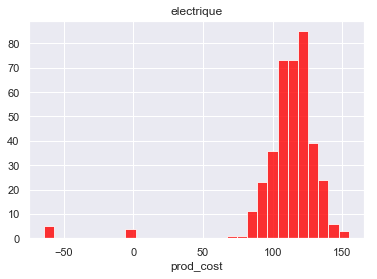

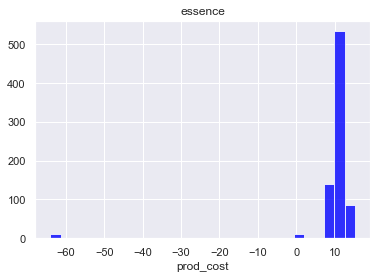

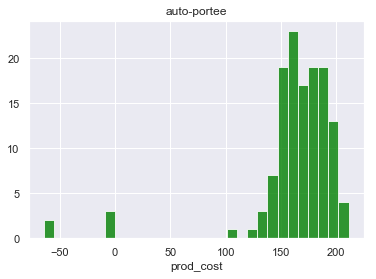

In [19]:
#prod_cost 
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['prod_cost'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

Les valeurs -64 et 0 semblent étranges, et manque de cohérences par rapport aux autres données.

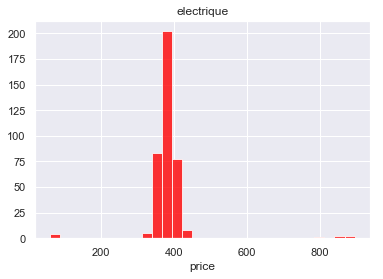

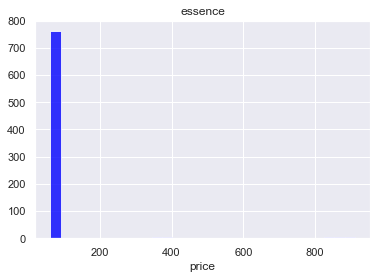

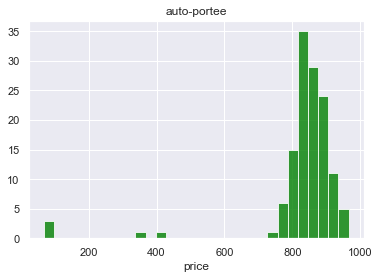

In [20]:
#price  
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['price'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

Il semblerait que nous ayons quelques valeurs incohérentes pour l'information du prix : 

In [21]:
dataset[(dataset['product_type'] == 'electrique') & ((dataset['price']<200) | (dataset['price']>800))]

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
162,39.294042,0.104430,19415,269.875578,895.908032,-64.0,electrique,Low,2ans,0.002157,0.561937
185,35.101579,0.094531,18486,264.497255,80.768167,-64.0,electrique,Low,2_ans.,0.002893,0.753937
204,35.759231,0.080239,18854,271.454095,853.113313,-64.0,electrique,Low,2 anss,0.001153,0.300319
224,38.004822,0.088918,18523,255.289862,75.161299,0.0,electrique,Low,2_anss,0.002752,0.717166
281,32.284422,0.087399,18895,299.179149,842.290304,-64.0,electrique,Low,2_ans,0.001571,0.409392
377,42.216049,0.090275,18512,274.573188,877.008432,0.0,electrique,Medium,2_ans.,0.002511,0.654159
525,28.149706,0.091212,19204,253.637540,78.051216,-64.0,electrique,Low,2_ans,0.002763,0.719915
535,43.410781,0.089094,19576,286.579692,62.162200,0.0,electrique,Low,2 anss,0.002389,0.622614


In [22]:
dataset[(dataset['product_type'] == 'auto-portee') & (dataset['price']<600)]

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
47,25.136228,0.044026,19549,618.616295,69.359766,0.0,auto-portee,Medium,3ans.,0.008874,0.907834
62,15.627623,0.041714,19448,657.152001,359.675157,-64.0,auto-portee,Low,3 ans,0.006839,0.699600
64,18.669448,0.036297,19368,738.279214,424.738557,0.0,auto-portee,Medium,3_ans.,0.007104,0.726770
103,18.889544,0.036835,19194,661.693700,77.249896,-64.0,auto-portee,Low,3 ans,0.006655,0.680852
126,12.417808,0.037797,19638,672.153234,74.156037,0.0,auto-portee,Hight,3_ans,0.007923,0.810591


In [23]:
dataset[(dataset['product_type'] == 'essence') & (dataset['price']>200)]

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
591,59.089766,0.198374,19065,66.589054,907.224715,0.0,essence,Hight,1 ans,0.001037,0.547045
593,57.385720,0.200876,19121,61.832802,910.237658,-64.0,essence,Low,1_an,0.001233,0.650412
632,53.057689,0.272022,19013,59.620476,746.037497,0.0,essence,Low,1_an.,0.001348,0.711382
771,71.079908,0.204975,19084,64.761574,370.268763,0.0,essence,Low,1_an,0.001273,0.671882
844,54.136865,0.212580,18956,58.926577,875.686141,0.0,essence,Low,1 an,0.001409,0.743584
873,73.951245,0.246320,18687,63.080659,882.868848,0.0,essence,Low,1an.,0.001277,0.673511
922,72.423733,0.261196,19336,68.353986,782.073365,0.0,essence,Hight,1 an,0.001087,0.573472
932,74.269568,0.243184,19322,65.897454,869.457389,-64.0,essence,Low,1 ans,0.001049,0.553251
936,79.907161,0.225768,18506,65.625049,396.370061,-64.0,essence,Medium,1_ans,0.001111,0.585933
950,49.481572,0.222445,19150,63.558960,373.261749,0.0,essence,Medium,1 an.,0.001124,0.593181


Il semblerait donc pour pour ses lignes le prix et le coût de production sont aberrants, nous décidons donc de les supprimer 

In [24]:
dataset = dataset[round(dataset['price'] - dataset['prod_cost'],2) == round(dataset['margin'],2)]

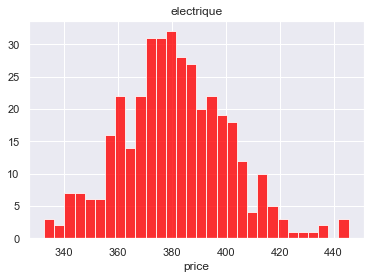

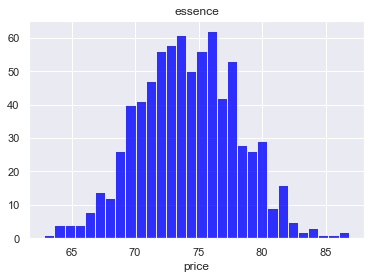

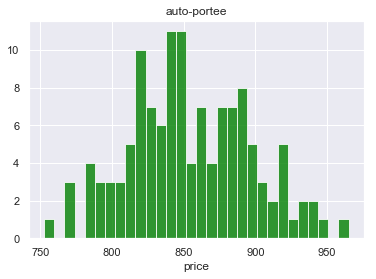

In [25]:
#price  
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['price'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

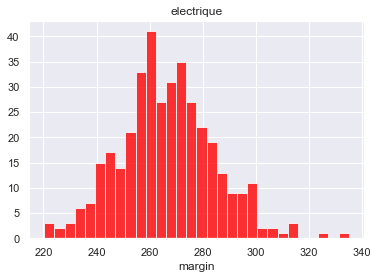

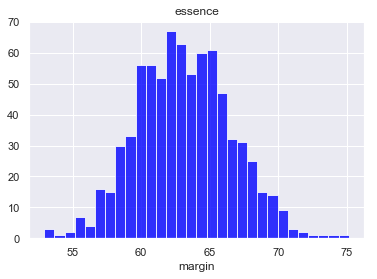

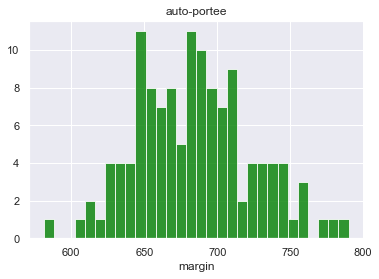

In [26]:
#margin  
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['margin'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

La distribution des prix et de la marge semblent maintenant cohérentes. 

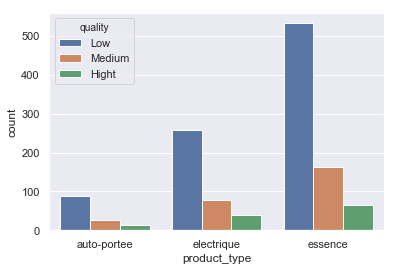

In [27]:
#quality  
sns.set()
sns.set_style('darkgrid')
sns.countplot(x=dataset['product_type'], hue= dataset['quality'])
plt.show()

Il semblerait qu'il y ait une typo dans le "high", sinon les données semblent cohérentes. 

In [28]:
#warranty 
set(dataset['warranty'])

{'1 an',
 '1 an.',
 '1 ans',
 '1_an',
 '1_an.',
 '1_ans',
 '1an',
 '1an.',
 '1ans',
 '2 ans',
 '2 ans.',
 '2 anss',
 '2_ans',
 '2_ans.',
 '2_anss',
 '2ans',
 '2ans.',
 '2anss',
 '3 ans',
 '3 ans.',
 '3 anss',
 '3_ans',
 '3_ans.',
 '3_anss',
 '3ans',
 '3ans.',
 '3anss'}

Il semblerait qu'il y est un problème de format dans la colonne de la garantie, cependant le premier caractère semble être à chaque fois celui qui contient l'information donc nous allons uniqueemnt conserver celui-ci.

In [29]:
dataset['warranty'] = dataset['warranty'].map(lambda x: x[0])
print(set(dataset['warranty']))

{'2', '1', '3'}


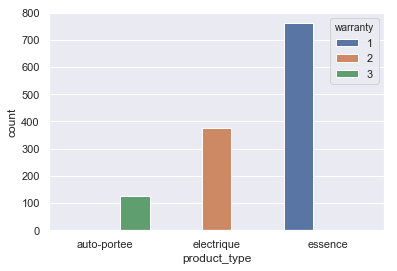

In [30]:
#warranty 
sns.set()
sns.set_style('darkgrid')
sns.countplot(x=dataset['product_type'], hue= dataset['warranty'])
plt.show()

Cependant cette feature semble assez inutile car homogènes par sous catégorie de produits. 

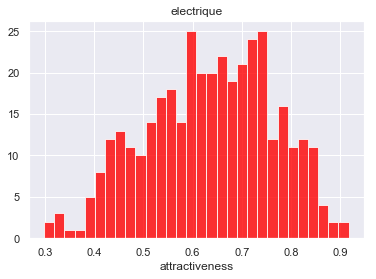

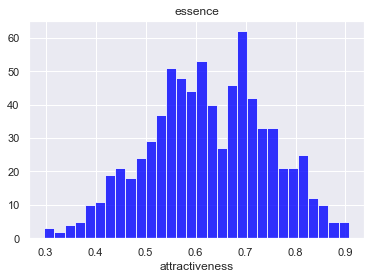

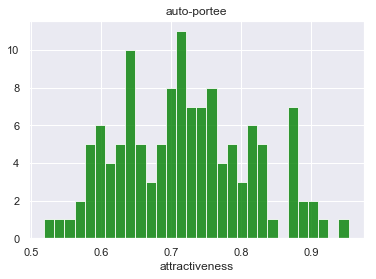

In [31]:
#attractiveness  
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.distplot(dataset['attractiveness'][dataset['product_type'] == product_type], kde = False, bins = 30, hist_kws= {'color' :color, 'alpha':0.8}).set(title = product_type)
    plt.show()

La cible de notre étude semble bien distribué avec un score entre 0 et 1. 

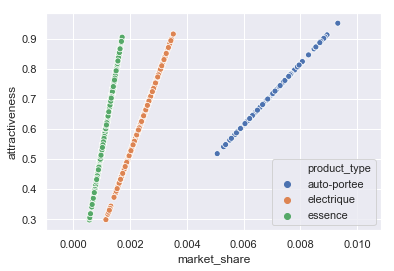

In [32]:
sns.scatterplot(x=dataset['market_share'], y=dataset['attractiveness'], hue= dataset['product_type'])
plt.show()

Comme on peut le voir et comme c'est indiqué dans l'exercice, la part de marché est juste une renomarlisation de l'attractivité. 

In [33]:
#target : 
dataset.groupby(['product_type']).agg({'market_share':'sum'})

,market_share
product_type,
auto-portee,0.885450
electrique,0.912683
essence,0.902604


La somme des parts de marchés est maintenant en dessous de 1 car nous avons retirer des lignes pour raisons de qualité de données 

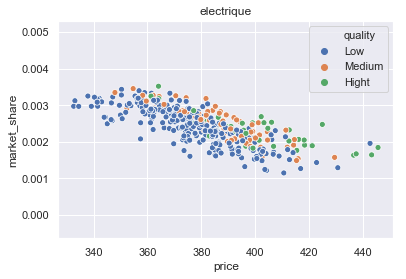

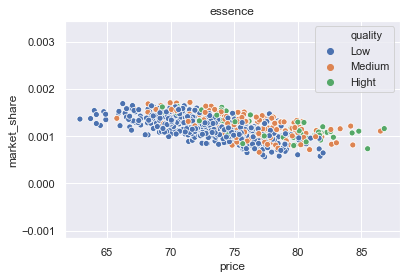

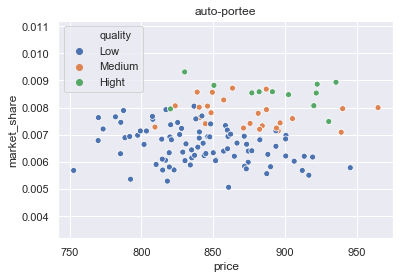

In [34]:
#Analyse de marché 
sns.set()
sns.set_style('darkgrid')
colors = ['red', 'blue' , 'green']
hue_order = ['Low', 'Medium', 'Hight']
for product_type, color in zip(set(dataset['product_type']), colors):
    sns.scatterplot(x='price', y='market_share', hue= 'quality', hue_order = hue_order, data=dataset[dataset['product_type']==product_type]).set(title = product_type)
    plt.show()


Une première analyse rapide et visuelle du prix et de la qualité semblent indiquer que les 3 marchés fonctionne de manière assez différente.  

L'id n'est pas très intéressant à regarder car il s'agit juste d'une référence. 

# 3. Feature engineering

In [35]:
#quality 
dataset = pd.get_dummies(dataset, columns=['quality'], drop_first = False)

In [36]:
dataset

,capacity,failure_rate,id,margin,price,prod_cost,product_type,warranty,market_share,attractiveness,quality_Hight,quality_Low,quality_Medium
0,10.492623,0.042528,18377,633.766584,828.802103,195.035519,auto-portee,3,0.006360,0.650648,0,1,0
1,20.273730,0.037896,19363,731.576817,882.894916,151.318099,auto-portee,3,0.006840,0.699792,0,1,0
2,20.190457,0.039111,19641,741.218202,919.355522,178.137319,auto-portee,3,0.006179,0.632129,0,1,0
3,27.220131,0.041303,18728,654.255635,817.085097,162.829462,auto-portee,3,0.007925,0.810730,0,1,0
4,16.370911,0.037938,18722,703.094527,844.581465,141.486938,auto-portee,3,0.007406,0.757614,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,40.831294,0.217289,18950,62.296416,69.391858,7.095443,essence,1,0.001163,0.613849,0,1,0
1394,44.959895,0.234647,18451,63.662561,75.161102,11.498540,essence,1,0.000973,0.513126,0,0,1
1395,59.356058,0.253694,18663,64.014543,75.395132,11.380589,essence,1,0.001038,0.547739,0,1,0
1397,66.855435,0.244948,18946,58.697122,68.491318,9.794197,essence,1,0.001644,0.867537,0,1,0


In [37]:
# margin as proportion 
dataset['margin_prop'] = dataset['margin']/dataset['price']

In [38]:
# price divided by number of failure 
dataset['failure_price'] = dataset['price']/dataset['failure_rate']

In [39]:
# rapport capacité prix 
dataset['capacity_price'] = dataset['capacity']/dataset['price']

# 4. Feature selection 

Nous retirons l'id et les données target du training set, ainsi que le product_type et la warranty puisque nous allons construire des modèles différents micro-marchés. 

In [10]:
features_list = [
    'capacity', 
    'failure_rate', 
    'margin', 
    'price', 
    'prod_cost',
    'margin_prop', 
    'failure_price',
    'capacity_price' ,
    'quality_Hight', 
    'quality_Medium', 
    'quality_Low',
    'attractiveness'  
]

In [41]:
dataset_electrique = dataset.loc[dataset['product_type']=='electrique' , features_list]

In [42]:
dataset_autoportee = dataset.loc[dataset['product_type']=='auto-portee', features_list] 

In [43]:
dataset_essence = dataset.loc[dataset['product_type']=='essence',features_list] 

### matrice de corrélation


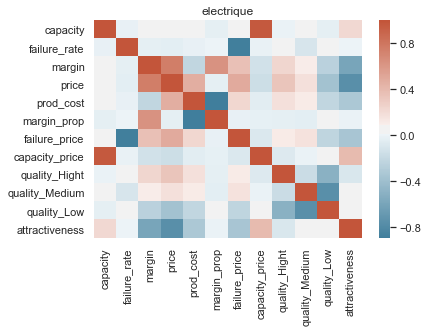

In [44]:
sns.set()
sns.set_style('darkgrid')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataset_electrique.corr(),cmap = cmap).set(title ='electrique')
plt.show()

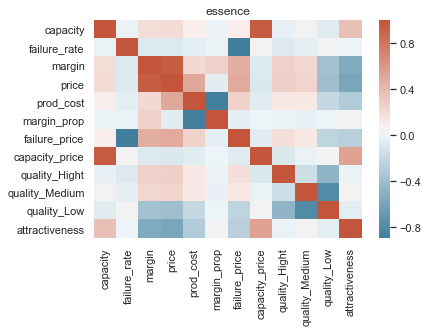

In [45]:
sns.set()
sns.set_style('darkgrid')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataset_essence.corr(),cmap = cmap).set(title ='essence')
plt.show()

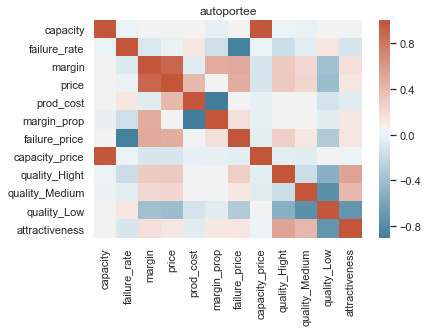

In [46]:
sns.set()
sns.set_style('darkgrid')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataset_autoportee.corr(),cmap = cmap).set(title ='autoportee')
plt.show()

# 5. Modélisation 

In [47]:
# On crée pour chacun des sous marché un set de training et de testing et notre target 

In [48]:
# electrique 
y_electrique = dataset_electrique.pop('attractiveness')
X_electrique_train, X_electrique_test, y_electrique_train, y_electrique_test = train_test_split(
    dataset_electrique, y_electrique, test_size=0.25, random_state=42
)

In [49]:
# essence 
y_essence = dataset_essence.pop('attractiveness')
X_essence_train, X_essence_test, y_essence_train, y_essence_test = train_test_split(
    dataset_essence, y_essence, test_size=0.25, random_state=42
)

In [50]:
# autoportee 
y_autoportee = dataset_autoportee.pop('attractiveness')
X_autoportee_train, X_autoportee_test, y_autoportee_train, y_autoportee_test = train_test_split(
    dataset_autoportee, y_autoportee, test_size=0.25, random_state=42
)

### Metrics

Nous allons utiliser le scoring de le root mean square logarithmique error pour évaluer nos résultats puisque c'est sur cette métrique que ous seront évalué : 

*   $RMSLE =  \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(log(\tilde{y_i}+1) - log(y_i+1)\Big)^2}}$


In [51]:
from sklearn.metrics import make_scorer
scoring=make_scorer(mean_squared_log_error, greater_is_better=False)

In [52]:
class ModelSearchCv:
  def __init__(self, model, param_grid, X_train, X_test, y_train, y_test, scoring_fit=scoring, cv=6):
    self.model = model
    self.param_grid = param_grid
    self.cv = cv
    self.scoring_fit = scoring_fit
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test

  def train(self):
    search_cv = GridSearchCV(estimator=self.model, param_grid=self.param_grid, cv=self.cv,
                             scoring=self.scoring_fit, n_jobs=-1, verbose=1)
    search_cv.fit(self.X_train, self.y_train)
    y_pred = search_cv.predict(self.X_test)
    
    print(f'RMSLE-score test data: {search_cv.score(self.X_test, self.y_test)}')
    print(f'best estimator : {search_cv.best_estimator_}')
    return search_cv

In [53]:
models_name = [
    LinearRegression(),
    KNeighborsRegressor(),
    #SVR(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(DecisionTreeRegressor()),
    RandomForestRegressor()
]
electrique_score = []
essence_score = []
autoportee_score = []

In [54]:
parameter_lr = {'fit_intercept' : [True]}
parameters_knr = {'n_neighbors': [1, 2, 3,4, 5, 6, 7, 8, 9, 10, 15]}
parameters_svr = {
    "kernel" : ["rbf","linear"],
    "C": [1]
}
parameters_dtr = {'max_depth': [2, 3, 4],
                 'min_samples_leaf': [4, 6, 8],
                 'min_samples_split': [2, 5, 10]
}
parameters_ada = {'base_estimator__max_depth': [2, 3, 4],
                 'base_estimator__min_samples_leaf': [4, 6, 8],
                 'base_estimator__min_samples_split': [2, 5, 10],
                 'n_estimators': [5, 10, 20]}
parameters_rf = {'max_depth': [2, 3, 4],
                 'min_samples_leaf': [4, 6, 8],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [5, 10, 20]}
parameter_list=[parameter_lr, parameters_knr, parameters_dtr, parameters_ada, parameters_rf]

## Electrique

In [55]:
for model, parameter in zip(models_name, parameter_list):
    model = ModelSearchCv(model, parameter ,X_electrique_train, X_electrique_test, y_electrique_train, y_electrique_test)
    model_trained = model.train()
    electrique_score.append(model_trained.score(X_electrique_test, y_electrique_test))

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.6s finished


RMSLE-score test data: -0.002222856103763014
best estimator : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitting 6 folds for each of 11 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   16.8s finished


RMSLE-score test data: -0.0040409747908473565
best estimator : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
Fitting 6 folds for each of 27 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   16.8s finished


RMSLE-score test data: -0.0027477722698469598
best estimator : DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   37.8s finished


RMSLE-score test data: -0.0021645546294966943
best estimator : AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=20,
         random_state=None)
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   34.5s finished


RMSLE-score test data: -0.0021727397657130805
best estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


Nous allons aussi utiliser des algorithmes plus avancées même si dans notre cas la volumétrie de donnée a la fois en termes de nombre d'exemple et de features. 

In [56]:
electrique_score

[-0.002222856103763014,
 -0.0040409747908473565,
 -0.0027477722698469598,
 -0.0021645546294966943,
 -0.0021727397657130805]

## Essence

In [57]:
for model, parameter in zip(models_name, parameter_list):
    model = ModelSearchCv(model, parameter ,X_essence_train, X_essence_test, y_essence_train, y_essence_test)
    model_trained = model.train()
    essence_score.append(model_trained.score(X_essence_test, y_essence_test))

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.0s finished


RMSLE-score test data: -0.0019323137237872285
best estimator : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitting 6 folds for each of 11 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   20.6s finished


RMSLE-score test data: -0.003301849908867875
best estimator : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')
Fitting 6 folds for each of 27 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   18.4s finished


RMSLE-score test data: -0.002594907677718621
best estimator : DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   35.8s finished


RMSLE-score test data: -0.0020261629116385452
best estimator : AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=20,
         random_state=None)
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   37.4s finished


RMSLE-score test data: -0.002081813246768431
best estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


## Autoportee

In [58]:
for model, parameter in zip(models_name, parameter_list):
    model = ModelSearchCv(model, parameter ,X_autoportee_train, X_autoportee_test, y_autoportee_train, y_autoportee_test)
    model_trained = model.train()
    autoportee_score.append(model_trained.score(X_autoportee_test, y_autoportee_test))

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.0s finished


RMSLE-score test data: -0.001056101626393369
best estimator : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitting 6 folds for each of 11 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   20.0s finished


RMSLE-score test data: -0.0025266243185835652
best estimator : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')
Fitting 6 folds for each of 27 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   17.0s finished


RMSLE-score test data: -0.001288787342358245
best estimator : DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 479 out of 486 | elapsed:   32.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   33.0s finished


RMSLE-score test data: -0.0013920596248646324
best estimator : AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=5,
         random_state=None)
Fitting 6 folds for each of 81 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   34.1s finished


RMSLE-score test data: -0.0014222699283190942
best estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


## Analyse des résultats

In [ ]:
models_df = pd.DataFrame({
    'Algorithm_name'   : models_name,
    'electrique' : electrique_score,
    'essence' : essence_score,
    'autoportee' : autoportee_score,
    
    }, columns = ['Algorithm_name', 'electrique','essence','autoportee'])

models_df

,Algorithm_name,electrique,essence,autoportee
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",-0.002223,-0.001932,-0.001056
1,"KNeighborsRegressor(algorithm='auto', leaf_siz...",-0.004041,-0.003302,-0.002527
2,"DecisionTreeRegressor(criterion='mse', max_dep...",-0.002748,-0.002595,-0.001289
3,AdaBoostRegressor(base_estimator=DecisionTreeR...,-0.002165,-0.002026,-0.001392
4,"RandomForestRegressor(bootstrap=True, criterio...",-0.002173,-0.002082,-0.001422


## Deep learning 

In [9]:
# X_electrique_train, X_electrique_test, y_electrique_train, y_electrique_test
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
shape_X=X_electrique_train.shape[1]
model.add(Dense(20,activation='relu',input_shape=(shape_X,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='softmax'))
sgd=SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])
model.fit(X_electrique_train,y_electrique_train,epochs=10)

## Analyse des meilleurs modèles 

# 6. Créations du fichier de réponse 

In [5]:
submission_set

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty
0,21.313064,0.037928,20049,613.061762,768.160605,155.098843,auto-portee,Medium,3 ans
1,25.797234,0.038664,19699,701.321608,865.727540,164.405932,auto-portee,Low,3 ans
2,14.314083,0.043118,19704,654.147498,807.374158,153.226660,auto-portee,Low,3 ans
3,29.754390,0.038551,20072,669.083239,866.573954,197.490715,auto-portee,Low,3 ans
4,24.915116,0.038829,20183,675.313221,859.205792,183.892571,auto-portee,Low,3 ans
...,...,...,...,...,...,...,...,...,...
595,55.514926,0.211208,19952,70.019558,81.337796,11.318238,essence,Hight,1 an
596,70.291927,0.155343,20107,60.958173,72.007901,11.049727,essence,Low,1 an
597,64.453485,0.181305,20071,66.996854,78.662357,11.665503,essence,Hight,1 an
598,58.217699,0.255710,19812,66.842325,80.047029,13.204704,essence,Hight,1 an


In [6]:
#quality 
submission_set = pd.get_dummies(submission_set, columns=['quality'], drop_first = False)

In [7]:
# margin as proportion 
submission_set['margin_prop'] = submission_set['margin']/submission_set['price']

In [8]:
# price divided by number of failure 
submission_set['failure_price'] = submission_set['price']/submission_set['failure_rate']

In [9]:
# rapport capacité prix 
submission_set['capacity_price'] = submission_set['capacity']/submission_set['price']

In [ ]:
product_types = ['electrique', 'auto-portee', 'essence']
trained_models = [ ]
for product_type, train_model in zip(product_types, trained_models)
    submission_set_electrique = submission_set.loc[submission_set['product_type']==product_type , features_list]
    id_list = submission_set.loc[submission_set['product_type']==product_type , 'id']
